In [1]:
import matplotlib.pyplot as plt
plt.rc('text', usetex = True)

import numpy as np
import os
from ast import literal_eval as liteval

import sys
sys.path.insert(0, os.getcwd().removesuffix("/lane"))
from file_utils import readData
sys.path.pop(0)

dirpath = "//media/ashwin/One Touch/ashwin_md/lane/Apr2025/lmp"
figpath = "/home/ashwin/Desktop/ashwin_md/LD/imgs/Apr2025/lane"

In [92]:
eq_steps = 1e7
dt = 5e-4
frameW = 1e5

nr_list = [22, 23, 24, 26, 27]

for i in range(len(nr_list)):

    fpath_x = os.path.join(dirpath, "Data{nr}".format(nr = nr_list[i]), "Sk_x.dat")
    fobj_x = open(fpath_x, mode = "r", encoding = "utf-8")
    
    line = fobj_x.readline().removesuffix("\n").split(sep = " ")
    kmin = liteval(line[2])
    kmax = liteval(line[4])
    Nk = liteval(line[6])

    step = []
    Lx = []

    for line in fobj_x:
        line = line.removesuffix(" \n").split(sep = " ")
        line = [liteval(i) for i in line]

        step.append(line[0])
        Sk = line[1:]

        kn = np.linspace(kmin, kmax, Nk)
        prod = [(abs(kn[i])*Sk[i]) for i in range(len(kn))]

        Lx.append(np.pi * np.trapz(Sk, kn) / np.trapz(prod, kn))

    fobj_x.close()

    fpath_y = os.path.join(dirpath, "Data{nr}".format(nr = nr_list[i]), "Sk_y.dat")
    print(fpath_x, fpath_y)
    fobj_y = open(fpath_y, mode = "r", encoding = "utf-8")
    
    line = fobj_y.readline().removesuffix("\n").split(sep = " ")
    kmin = liteval(line[2])
    kmax = liteval(line[4])
    Nk = liteval(line[6])

    step = []
    Ly = []

    for line in fobj_y:
        line = line.removesuffix(" \n").split(sep = " ")
        line = [liteval(i) for i in line]
    
        step.append(line[0])
        Sk = line[1:]
    
        kn = np.linspace(kmin, kmax, Nk)
        prod = [(abs(kn[i])*Sk[i]) for i in range(len(kn))]
    
        Ly.append(np.pi * np.trapz(Sk, kn) / np.trapz(prod, kn))
    
    fobj_y.close()

    time = [(i-eq_steps)*dt for i in step] 

    outpath = os.path.join(dirpath, "Data{nr}".format(nr = nr_list[i]), "length_scales.dat")
    fobj_out = open(outpath, mode = "w", encoding = "utf-8")

    fobj_out.write("time Lx Ly\n")
    for j in range(len(time)):
        fobj_out.write("{t} {lx} {ly}\n".format(t = time[j], lx = Lx[j], ly = Ly[j]))

    fobj_out.close()

    print("Data{nr}: Lx (min,max,avg): ({lxmin},{lxmax},{lxavg})".format(nr=nr_list[i],lxmin=min(Lx),lxmax=max(Lx),lxavg=np.average(Lx)))
    print("Data{nr}: Ly (min,max,avg): ({lymin},{lymax},{lyavg})".format(nr=nr_list[i],lymin=min(Ly),lymax=max(Ly),lyavg=np.average(Ly)))

//media/ashwin/One Touch/ashwin_md/lane/Apr2025/lmp/Data22/Sk_x.dat //media/ashwin/One Touch/ashwin_md/lane/Apr2025/lmp/Data22/Sk_y.dat
Data22: Lx (min,max,avg): (18.913757910235546,50.26200680520181,30.226298373921825)
Data22: Ly (min,max,avg): (2.756203993725234,8.60556551417673,4.74343560378989)
//media/ashwin/One Touch/ashwin_md/lane/Apr2025/lmp/Data23/Sk_x.dat //media/ashwin/One Touch/ashwin_md/lane/Apr2025/lmp/Data23/Sk_y.dat
Data23: Lx (min,max,avg): (21.562652116955345,56.791781906869204,34.56704402399595)
Data23: Ly (min,max,avg): (2.8685990689437797,8.30048148589142,4.644336302459359)
//media/ashwin/One Touch/ashwin_md/lane/Apr2025/lmp/Data24/Sk_x.dat //media/ashwin/One Touch/ashwin_md/lane/Apr2025/lmp/Data24/Sk_y.dat
Data24: Lx (min,max,avg): (24.849659166312453,67.72944066542189,39.97229217332963)
Data24: Ly (min,max,avg): (2.8340213668121437,8.307828757550725,4.675718673844061)
//media/ashwin/One Touch/ashwin_md/lane/Apr2025/lmp/Data26/Sk_x.dat //media/ashwin/One Touch/ash

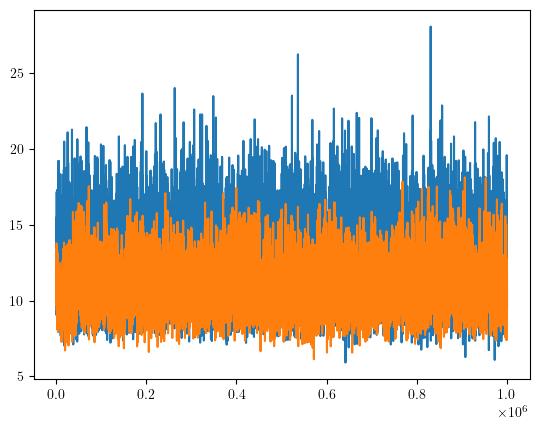

In [54]:
fig, ax = plt.subplots()

ax.plot(time, Lx)
ax.plot(time, Ly)

[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100]


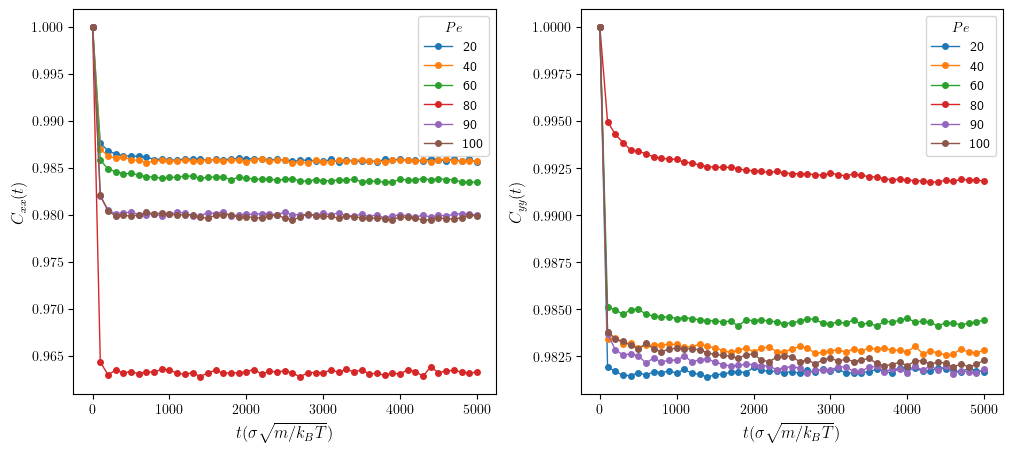

In [5]:
# Time Correlation Function analysis

eq_steps = 1e7
dt = 5e-4
frameW = 1e5

nr_list = [22, 23, 24, 25, 26, 27]
Pe_list = [20, 40, 60, 80, 90, 100]

delFrames = [0, 1]
for i in range(3):
    # delFrames.append(1*10**i)
    delFrames.append(2*10**i)
    delFrames.append(4*10**i)
    delFrames.append(5*10**i)
    delFrames.append(7*10**i)
    delFrames.append(10*10**i)

delFrames = np.arange(0, 102, 2)
print(delFrames)

fig1, ax1 = plt.subplots(1, 2, figsize = (12, 5))

for i in range(len(nr_list)):

    corr_x = np.zeros(len(delFrames))
    corr_y = np.zeros(len(delFrames))
    counts = np.zeros(len(delFrames))
    
    fpath = os.path.join(dirpath, "Data{nr}".format(nr = nr_list[i]), "length_scales.dat")
    [[t, Lx, Ly], _] = readData(fpath, 1)

    corr_x0 = [j*j for j in Lx]
    corr_y0 = [j*j for j in Ly]
    corr_x0 = np.average(corr_x0)
    corr_y0 = np.average(corr_y0)
    
    for j in range(len(t)):
        ctr = 0
        for k in range(j, len(t)):
            if(k - j == delFrames[ctr]):
                corr_x[ctr] += Lx[j] * Lx[k]
                corr_y[ctr] += Ly[j] * Ly[k]
                counts[ctr] += 1
                ctr += 1
            
            if(ctr == len(delFrames)):
                break    
    
    for j in range(len(delFrames)):
        corr_x[j] = corr_x[j]/(corr_x0 * counts[j])
        corr_y[j] = corr_y[j]/(corr_y0 * counts[j])

    time = [j*frameW*dt for j in delFrames]

    ax1[0].plot(time, corr_x, "o-", ms = 4, lw = 1, label = "{pe}".format(pe = Pe_list[i]))
    ax1[1].plot(time, corr_y, "o-", ms = 4, lw = 1, label = "{pe}".format(pe = Pe_list[i]))

for i in range(len(ax1)):
    ax1[i].set_xlabel(r"$t (\sigma\sqrt{m/k_BT})$", fontsize = 12)
    ax1[i].legend(title = r"$Pe$", fontsize = 10)

ax1[0].set_ylabel(r"$C_{xx} (t)$", fontsize = 12)
ax1[1].set_ylabel(r"$C_{yy} (t)$", fontsize = 12)

fig1.savefig(os.path.join(figpath, "length_corr.png"), dpi = 500, bbox_inches = "tight")